In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
#序列化的库
import pickle
import datetime
import os
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer

#### About loading models

In [ ]:
# Loading the saved models
# decision_tree_model_pkl = open(decision_tree_pkl_filename, 'rb')
# decision_tree_model = pickle.load(decision_tree_model_pkl)
# print "Loaded Decision tree model :: ", decision_tree_model

#### About saving models

In [ ]:
# Dump the trained LightGB classifier with Pickle
# Lightgb_pkl_filename = 'Lightgb_classifier_20170719.pkl'
# Open the file to save as pkl file
# Lightgb_model_pkl = open(Lightgb_pkl_filename, 'wb')
# pickle.dump(bst,Lightgb_model_pkl )
# Close the pickle instances
# Lightgb_model_pkl.close()

In [3]:
xtrain = pd.read_csv("Airbnb_xtrain.csv",index_col = 0)

In [4]:
ytrain = pd.read_csv("Airbnb_ytrain.csv", header = None)

In [5]:
xtrain.head()

,tfa_year,tfa_month,tfa_day,tfa_wd_1,tfa_wd_2,tfa_wd_3,tfa_wd_4,tfa_wd_5,tfa_wd_6,tfa_wd_7,...,c_447,c_448,c_449,c_450,c_451,c_452,c_453,c_454,c_455,all_null
0,2009,3,19,0,0,0,1,0,0,0,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,456
1,2009,5,23,0,0,0,0,0,1,0,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,456
2,2009,6,9,0,1,0,0,0,0,0,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,456
3,2009,10,31,0,0,0,0,0,1,0,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,456
4,2009,12,8,0,1,0,0,0,0,0,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,456


In [6]:
ytrain.head(10)

,0
0,NDF
1,NDF
2,US
3,other
4,US
5,US
6,US
7,US
8,US
9,US


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ytrain_le = le.fit_transform(ytrain.values)

E:\Py\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
ytrain_le.shape

(213451,)

In [9]:
ytrain_le

array([ 7,  7, 10, ...,  7,  7,  7])

In [11]:
#拿出原数据的百分之十作为研究对象 
n = int(xtrain.shape[0] * 0.1)
print (n)
xtrain_new = xtrain.iloc[: n, :]
ytrain_new = ytrain_le[: n]

21345


In [11]:
print (xtrain_new.shape)
print (ytrain_new.shape)

(2134, 203)
(2134,)


# 1. StandardScaling the dataset

简而言之就是因为很多模型是基于正态分布假设的，所以对原始数据做一下数学标准化的处理

Standardization of a dataset is a common requirement for many machine learning estimators: 

they might behave badly if the individual feature do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

For instance many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. 

If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.


In [12]:
X_scaler = StandardScaler()
xtrain_new = X_scaler.fit_transform(xtrain_new)

E:\Py\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\Py\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# 2. Airbnb Evaluation: NDCG
[NDCG搜索评价指标作为模型优良的判断标准](https://www.jianshu.com/p/f4999bf7d986)

[NDCG计算方法说明](.\NDCG.pdf)

In [13]:
x = np.array([1.48, 1.41, 0.0, 0.1])
order = np.argsort(x)[::-1]

In [14]:
order

array([0, 1, 3, 2], dtype=int64)

In [20]:
lb = LabelBinarizer()
lb.fit(range(11))

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [21]:
?lb

In [16]:
ground_truth = [1, 0, 2, 2, 3, 12, 1, 0, 6, 7]

In [17]:
T = lb.transform(ground_truth)

In [18]:
T

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

In [13]:
# From Kaggle Kernels

from sklearn.metrics import make_scorer

def dcg_score(y_true, y_score, k = 5):
    
    """
    y_true : array, shape = [n_samples]
        Ground truth (true relevance labels).
    y_score : array, shape = [n_samples, n_classes]
        Predicted scores.
    k : int
    """
    order = np.argsort(y_score)[: : -1]
    y_true = np.take(y_true, order[: k])
    
    
    #order = [3,2,1,7]
    #y_true = [0,1,0,0]
    #y_true =[0,0,1,0]
    
    

    gain = 2 ** y_true - 1

    discounts = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gain / discounts)
    # 0 doesn't count =>>>> only reduce 1 


def ndcg_score(ground_truth, predictions, k = 5):
    
    """
    Parameters
    ----------
    ground_truth : array, shape = [n_samples]
        Ground truth (true labels represended as integers).
    predictions : array, shape = [n_samples, n_classes]
        Predicted probabilities.
    k : int
        Rank.
        
    Example
    -------
    >>> ground_truth = [1, 0, 2]
    >>> predictions = [[0.15, 0.55, 0.2], [0.7, 0.2, 0.1], [0.06, 0.04, 0.9]]
    >>> score = ndcg_score(ground_truth, predictions, k=2)
    1.0
    >>> predictions = [[0.9, 0.5, 0.8], [0.7, 0.2, 0.1], [0.06, 0.04, 0.9]]
    >>> score = ndcg_score(ground_truth, predictions, k=2)
    0.6666666666
    """
    lb = LabelBinarizer()
    lb.fit(range(len(predictions) + 1))
    T = lb.transform(ground_truth)
    
    #ground_truth = [1, 0, 2]  =>>>> 
    #ground_truth : [[0, 1, 0],       [1, 0, 0],    [0, 0, 1]]
    #predictions: [[0.15, 0.55, 0.2], [0.7, 0.2, 0.1], [0.06, 0.04, 0.9]]
    #zip =>>> take one vector from each batch

    scores = []

    # Iterate over each y_true and compute the DCG score
    for y_true, y_score in zip(T, predictions):
        actual = dcg_score(y_true, y_score, k)
        best = dcg_score(y_true, y_true, k)
        score = float(actual) / float(best)
        scores.append(score)

    return np.mean(scores)

# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 1.0, penalty = 'l2', multi_class = 'ovr')
print (lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [15]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [16]:
RANDOM_STATE = 2017

kf = KFold(n_splits = 5, random_state = RANDOM_STATE)

In [17]:
y_train

NameError: name 'y_train' is not defined

In [18]:
train_score = []
cv_score = []

# select a k  (value how many y):
k_ndcg = 3

for train_index, test_index in kf.split(xtrain_new, ytrain_new):
    
    X_train, X_test = xtrain_new[train_index, :], xtrain_new[test_index, :]
    y_train, y_test = ytrain_new[train_index], ytrain_new[test_index]
    
    print (X_train.shape, X_test.shape)
    
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict_proba(X_test)
    
    # for binary classification: we used to use f1 score, precision, recall, auc score.
    # here for Airbnb we use the ndcg evaluation. 
    
    train_ndcg_score = ndcg_score(y_train, lr.predict_proba(X_train), k = k_ndcg)
    cv_ndcg_score = ndcg_score(y_test, y_pred, k = k_ndcg)
    
    train_score.append(train_ndcg_score)
    cv_score.append(cv_ndcg_score)
    
print ("\nThe training score is: {}".format(np.mean(train_score)))
print ("\nThe cv score is: {}".format(np.mean(cv_score)))

(1707, 203) (427, 203)
(1707, 203) (427, 203)
(1707, 203) (427, 203)
(1707, 203) (427, 203)
(1708, 203) (426, 203)

The training score is: 0.7248300419244074

The cv score is: 0.6376237921332676


In [19]:
cv_score_lr = 0.744

# 1. Learning curve of logistic regression

## 1.1 Changing iteration

In [17]:
# set the iterations

iteration = [1,5,10,15,20, 50, 100]

kf = KFold(n_splits = 3, random_state = RANDOM_STATE)

train_score = []
cv_score = []

# select a k:
k_ndcg = 5

for i, item in enumerate(iteration):
    
    print ('{} iterations:'.format(item))
    
    lr = LogisticRegression(C = 1.0, max_iter = item, tol = 1e-5, solver = 'newton-cg', multi_class = 'ovr')
    #print coefficients   
    print (lr)
    
    train_score_iter = []
    cv_score_iter = []

    for train_index, test_index in kf.split(xtrain_new, ytrain_new):

        X_train, X_test = xtrain_new[train_index, :], xtrain_new[test_index, :]
        y_train, y_test = ytrain_new[train_index], ytrain_new[test_index]

        print (X_train.shape, X_test.shape)
        
        lr.fit(X_train, y_train)

        y_pred = lr.predict_proba(X_test)

        # for binary classification: we used to use f1 score, precision, recall, auc score.
        # here for Airbnb we use the ndcg evaluation. 

        train_ndcg_score = ndcg_score(y_train, lr.predict_proba(X_train), k = k_ndcg)
        cv_ndcg_score = ndcg_score(y_test, y_pred, k = k_ndcg)

        
        train_score_iter.append(train_ndcg_score)
        cv_score_iter.append(cv_ndcg_score)
        
    train_score.append(np.mean(train_score_iter))
    cv_score.append(np.mean(cv_score_iter))
    
    print ("\nThe training score is: {}".format(np.mean(train_score_iter)))
    print ("The cv score is: {}\n".format(np.mean(cv_score_iter)))

1 iterations:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=1e-05,
          verbose=0, warm_start=False)
(1422, 203) (712, 203)


/Users/zepeng/anaconda/lib/python3.5/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


(1423, 203) (711, 203)
(1423, 203) (711, 203)

The training score is: 0.6935203627647866
The cv score is: 0.1349427435229412

5 iterations:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=1e-05,
          verbose=0, warm_start=False)
(1422, 203) (712, 203)


/Users/zepeng/anaconda/lib/python3.5/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


(1423, 203) (711, 203)
(1423, 203) (711, 203)

The training score is: 0.722233413546582
The cv score is: 0.39987041031511045

10 iterations:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=1e-05,
          verbose=0, warm_start=False)
(1422, 203) (712, 203)


/Users/zepeng/anaconda/lib/python3.5/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


(1423, 203) (711, 203)
(1423, 203) (711, 203)

The training score is: 0.7246245793472205
The cv score is: 0.6363398120100564

15 iterations:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=15, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=1e-05,
          verbose=0, warm_start=False)
(1422, 203) (712, 203)


/Users/zepeng/anaconda/lib/python3.5/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


(1423, 203) (711, 203)
(1423, 203) (711, 203)

The training score is: 0.7253842898244499
The cv score is: 0.6434609695610553

20 iterations:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=20, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=1e-05,
          verbose=0, warm_start=False)
(1422, 203) (712, 203)
(1423, 203) (711, 203)
(1423, 203) (711, 203)

The training score is: 0.7253842898244499
The cv score is: 0.6434609695610553

50 iterations:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=1e-05,
          verbose=0, warm_start=False)
(1422, 203) (712, 203)
(1423, 203) (711, 203)
(1423, 203) (711, 203)

The training score is: 0.7253842898244499
The cv score is: 0.6434609695610553

100 iterations:
Logi

In [18]:
y_train

array([ 7,  7, 10, ..., 10,  2,  5])

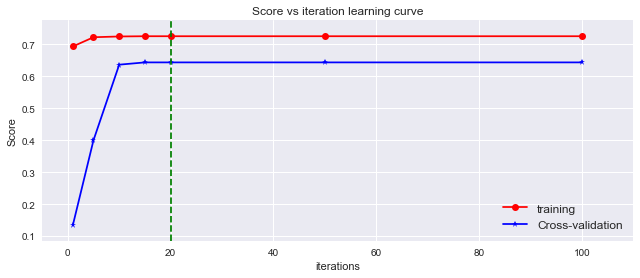

In [19]:
ymin = np.min(cv_score) - 0.05
ymax = np.max(train_score) + 0.05

plt.figure(figsize = (9, 4))
plt.plot(iteration, train_score, 'ro-', label = 'training')
plt.plot(iteration, cv_score, 'b*-', label = 'Cross-validation')
plt.xlabel("iterations")
plt.ylabel("Score")
plt.xlim(-5, np.max(iteration) + 10)
plt.ylim(ymin, ymax)
plt.plot(np.linspace(20, 20, 50), np.linspace(ymin, ymax, 50), 'g--')
plt.legend(loc = 'lower right', fontsize = 12)
plt.title("Score vs iteration learning curve")

plt.tight_layout()

## 1.2 Varying data size

In [ ]:
# Chaning the sampling size
# set the iter to the best iteration: iter = 20

perc = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]
#结果显示20%数据之后基本上就不变了

kf = KFold(n_splits = 3, random_state = RANDOM_STATE)

train_score = []
cv_score = []

# select a k:
k_ndcg = 5

for i, item in enumerate(perc):
    
    print '{}% of the data'.format(int(item * 100))
    
    lr = LogisticRegression(C = 1.0, max_iter = 20, tol = 1e-6, solver = 'newton-cg', multi_class = 'ovr')
        
    print lr
    
    train_score_iter = []
    cv_score_iter = []
    
    n = int(xtrain_new.shape[0] * item)
    xtrain_perc = xtrain_new[: n, :]
    ytrain_perc = ytrain_new[: n]


    for train_index, test_index in kf.split(xtrain_perc, ytrain_perc):
        
        X_train, X_test = xtrain_perc[train_index, :], xtrain_perc[test_index, :]
        y_train, y_test = ytrain_perc[train_index], ytrain_perc[test_index]

        print X_train.shape, X_test.shape
        
        lr.fit(X_train, y_train)

        y_pred = lr.predict_proba(X_test)

        # for binary classification: we used to use f1 score, precision, recall, auc score.
        # here for Airbnb we use the ndcg evaluation. 

        train_ndcg_score = ndcg_score(y_train, lr.predict_proba(X_train), k = k_ndcg)
        cv_ndcg_score = ndcg_score(y_test, y_pred, k = k_ndcg)

        train_score_iter.append(train_ndcg_score)
        cv_score_iter.append(cv_ndcg_score)
        
    train_score.append(np.mean(train_score_iter))
    cv_score.append(np.mean(cv_score_iter))
    
    print "\nThe training score is: {}".format(np.mean(train_score_iter))
    print "The cv score is: {}\n".format(np.mean(cv_score_iter))

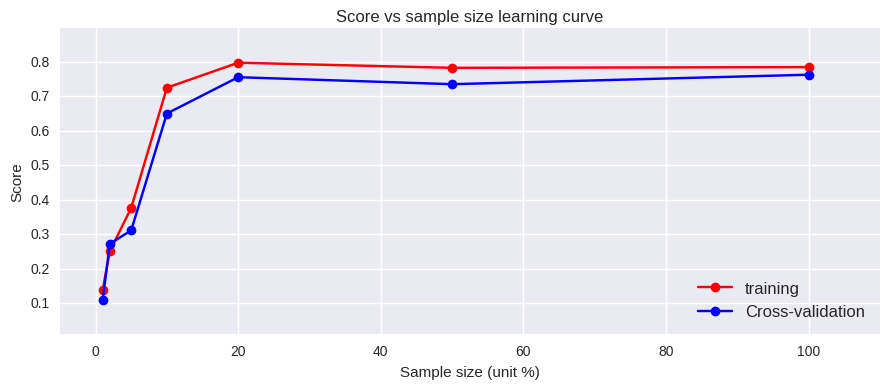

In [46]:
ymin = np.min(cv_score) - 0.1
ymax = np.max(train_score) + 0.1

plt.figure(figsize = (9, 4))
plt.plot(np.array(perc) * 100, train_score, 'ro-', label = 'training')
plt.plot(np.array(perc) * 100, cv_score, 'bo-', label = 'Cross-validation')
plt.xlabel("Sample size (unit %)")
plt.ylabel("Score")
plt.xlim(-5, np.max(perc) * 100 + 10)
plt.ylim(ymin, ymax)

plt.legend(loc = 'lower right', fontsize = 12)
plt.title("Score vs sample size learning curve")

plt.tight_layout()

In [20]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import *
from sklearn.svm import SVC, LinearSVC, NuSVC

# 2. Tree method

In [21]:
LEARNING_RATE = 0.1
N_ESTIMATORS = 50
RANDOM_STATE = 2017
MAX_DEPTH = 9

clf_tree ={
    'DTree': DecisionTreeClassifier(max_depth = MAX_DEPTH,
                                    random_state = RANDOM_STATE),
    
    'RF': RandomForestClassifier(n_estimators = N_ESTIMATORS,
                                 max_depth = MAX_DEPTH,
                                 random_state = RANDOM_STATE),
    
    'AdaBoost': AdaBoostClassifier(n_estimators = N_ESTIMATORS,
                                   learning_rate = LEARNING_RATE,
                                   random_state = RANDOM_STATE),
    
    'Bagging': BaggingClassifier(n_estimators = N_ESTIMATORS,
                                 random_state = RANDOM_STATE),
    
    'ExtraTree': ExtraTreesClassifier(max_depth = MAX_DEPTH,
                                      n_estimators = N_ESTIMATORS,
                                      random_state = RANDOM_STATE),
    
    'GraBoost': GradientBoostingClassifier(learning_rate = LEARNING_RATE,
                                           max_depth = MAX_DEPTH,
                                           n_estimators = N_ESTIMATORS,
                                           random_state = RANDOM_STATE)
}

In [36]:
for key in clf_tree.keys():
    
    print (clf_tree.get(key))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2017,
            splitter='best')
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=9, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=2017, verbose=0, warm_start=False)
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=50, random_state=2017)
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=9,


In [22]:
train_score = []
cv_score = []

kf = KFold(n_splits = 3, random_state = RANDOM_STATE)

k_ndcg = 5

for key in clf_tree.keys():
    
    clf = clf_tree.get(key)
    print (clf)
    
    train_score_iter = []
    cv_score_iter = []

    for train_index, test_index in kf.split(xtrain_new, ytrain_new):

        X_train, X_test = xtrain_new[train_index, :], xtrain_new[test_index, :]
        y_train, y_test = ytrain_new[train_index], ytrain_new[test_index]

        print (X_train.shape, X_test.shape)
        
        clf.fit(X_train, y_train)

        y_pred = clf.predict_proba(X_test)

        # for binary classification: we used to use f1 score, precision, recall, auc score.
        # here for Airbnb we use the ndcg evaluation. 

        train_ndcg_score = ndcg_score(y_train, clf.predict_proba(X_train), k = k_ndcg)
        cv_ndcg_score = ndcg_score(y_test, y_pred, k = k_ndcg)

        train_score_iter.append(train_ndcg_score)
        cv_score_iter.append(cv_ndcg_score)
        
    train_score.append(np.mean(train_score_iter))
    cv_score.append(np.mean(cv_score_iter))
    
    print ("\nThe training score is: {}".format(np.mean(train_score_iter)))
    print ("The cv score is: {}\n".format(np.mean(cv_score_iter)))

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=9, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=2017, verbose=0, warm_start=False)
(1422, 203) (712, 203)
(1423, 203) (711, 203)
(1423, 203) (711, 203)

The training score is: 0.8056400302717445
The cv score is: 0.6939823831317735

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2017,
            splitter='best')
(1422, 203) (712, 203)
(1423, 203) (711, 203)
(1423, 203) (711, 203)

The training score is: 0.791693332

In [23]:
train_score_tree = train_score
cv_score_tree = cv_score

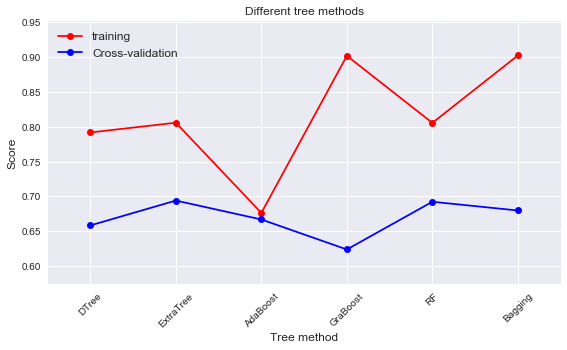

In [39]:
ymin = np.min(cv_score)-0.05
ymax = np.max(train_score)+0.05

x_ticks = clf_tree.keys()

plt.figure(figsize=(8,5))
plt.plot(range(len(x_ticks)), train_score_tree, 'ro-', label = 'training')
plt.plot(range(len(x_ticks)),cv_score_tree, 'bo-', label = 'Cross-validation')

plt.xticks(range(len(x_ticks)),x_ticks,rotation = 45, fontsize = 10)
plt.xlabel("Tree method", fontsize = 12)
plt.ylabel("Score", fontsize = 12)
plt.xlim(-0.5, 5.5)
plt.ylim(ymin, ymax)

plt.legend(loc = 'best', fontsize = 12)
plt.title("Different tree methods")

plt.tight_layout()

# 3. RandomForestClassifier

In [24]:
# estimator numbers:

#num_estimators = [10, 50, 100, 200, 500, 1000]
num_estimators = 10 + np.arange(10) * 20

train_score_rf = []
cv_score_rf = []

X_train, X_test, y_train, y_test = train_test_split(xtrain_new, ytrain_new, test_size = 0.2, 
                                                    random_stat e= RANDOM_STATE)

k_ndcg = 5

for item in num_estimators:
    
    print "the num of estimator in RF is:{}".format(item)
    
    clf = RandomForestClassifier(n_estimators = item, 
                                 random_state = RANDOM_STATE, 
                                 max_depth = MAX_DEPTH)
    print clf

        
    clf.fit(X_train, y_train)

    y_pred = clf.predict_proba(X_test)

    # for binary classification: we used to use f1 score, precision, recall, auc score.
    # here for Airbnb we use the ndcg evaluation. 

    train_ndcg_score = ndcg_score(y_train, clf.predict_proba(X_train), k = k_ndcg)
    cv_ndcg_score = ndcg_score(y_test, y_pred, k = k_ndcg)

    train_score_rf.append(train_ndcg_score)
    cv_score_rf.append(cv_ndcg_score)
    
    print ("\nThe training score is: {}".format(train_ndcg_score))
    print ("The cv score is: {}\n".format(cv_ndcg_score))

SyntaxError: invalid syntax (<ipython-input-24-36b594364e68>, line 16)

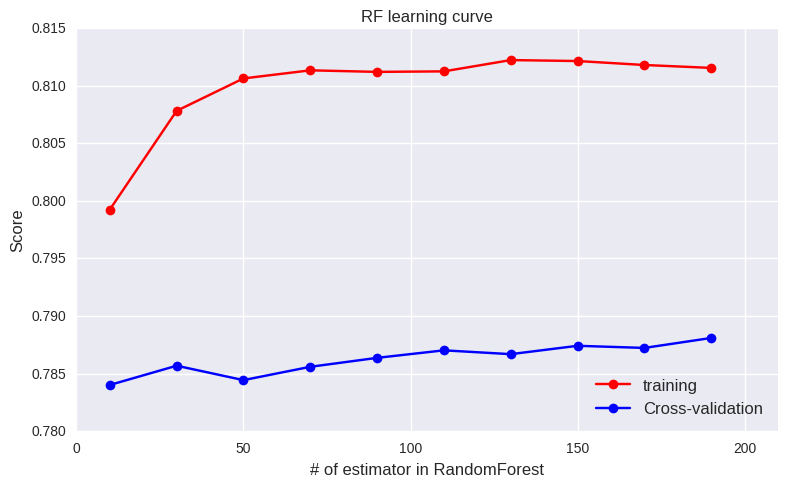

In [55]:
plt.figure(figsize = (8, 5))
plt.plot(num_estimators, train_score_rf, 'ro-', label = 'training')
plt.plot(num_estimators,cv_score_rf, 'bo-', label = 'Cross-validation')

plt.xlabel("# of estimator in RandomForest", fontsize = 12)
plt.ylabel("Score", fontsize = 12)
plt.xlim(0, np.max(num_estimators)+20)


plt.legend(loc = 'best', fontsize = 12)
plt.title("RF learning curve")

plt.tight_layout()

In [172]:
#  play with other parameters

# 4. SVM

In [25]:
TOL = 1e-4
MAX_ITER = 1000


clf_svm = {
    
    'SVM-rbf': SVC(kernel = 'rbf',
                   max_iter = MAX_ITER,
                   tol = TOL, random_state = RANDOM_STATE,
                   decision_function_shape = 'ovr'),     # solver : libsvm
    
    'SVM-poly': SVC(kernel = 'poly',
                   max_iter = MAX_ITER,
                   tol = TOL, random_state = RANDOM_STATE,
                   decision_function_shape = 'ovr'),      # solver : libsvm
    
    'SVM-linear': SVC(kernel = 'linear',
                      max_iter = MAX_ITER,
                      tol = TOL, 
                      random_state = RANDOM_STATE,
                      decision_function_shape = 'ovr'),   # solver : libsvm
    
    'LinearSVC': LinearSVC(max_iter = MAX_ITER,
                            tol = TOL,
                            random_state = RANDOM_STATE,
                            multi_class = 'ovr')        # solver: liblinear
}

In [26]:
for key in clf_svm.keys():
    
    print (clf_svm.get(key))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=2017, tol=0.0001,
     verbose=0)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=1000, probability=False, random_state=2017, shrinking=True,
  tol=0.0001, verbose=False)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=1000, probability=False, random_state=2017, shrinking=True,
  tol=0.0001, verbose=False)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=1000, probability=False, random_state=2017, shrinking=True,
  tol=0.0001, verbose=False)


In [27]:
train_score_svm = []
cv_score_svm = []

kf = KFold(n_splits = 3, random_state = RANDOM_STATE)

k_ndcg = 5

for key in clf_svm.keys():
    
    clf = clf_svm.get(key)
    print (clf)
    
    train_score_iter = []
    cv_score_iter = []

    for train_index, test_index in kf.split(xtrain_new, ytrain_new):

        X_train, X_test = xtrain_new[train_index, :], xtrain_new[test_index, :]
        y_train, y_test = ytrain_new[train_index], ytrain_new[test_index]

        print (X_train.shape, X_test.shape)
        
        clf.fit(X_train, y_train)

        y_pred = clf.decision_function(X_test)

        # for binary classification: we used to use f1 score, precision, recall, auc score.
        # here for Airbnb we use the ndcg evaluation. 

        train_ndcg_score = ndcg_score(y_train, clf.decision_function(X_train), k = k_ndcg)
        cv_ndcg_score = ndcg_score(y_test, y_pred, k = k_ndcg)

        train_score_iter.append(train_ndcg_score)
        cv_score_iter.append(cv_ndcg_score)
        
    train_score_svm.append(np.mean(train_score_iter))
    cv_score_svm.append(np.mean(cv_score_iter))
    
    print ("\nThe training score is: {}".format(np.mean(train_score_iter)))
    print ("The cv score is: {}\n".format(np.mean(cv_score_iter)))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=2017, tol=0.0001,
     verbose=0)
(1422, 203) (712, 203)
(1423, 203) (711, 203)
(1423, 203) (711, 203)

The training score is: 0.7211383367308996
The cv score is: 0.40473254124748914

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=1000, probability=False, random_state=2017, shrinking=True,
  tol=0.0001, verbose=False)
(1422, 203) (712, 203)


/Users/zepeng/anaconda/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


(1423, 203) (711, 203)
(1423, 203) (711, 203)

The training score is: 0.6994043553248188
The cv score is: 0.6469618129398517

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=1000, probability=False, random_state=2017, shrinking=True,
  tol=0.0001, verbose=False)
(1422, 203) (712, 203)


/Users/zepeng/anaconda/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


(1423, 203) (711, 203)
(1423, 203) (711, 203)

The training score is: 0.7432618578541538
The cv score is: 0.718437726446267

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=1000, probability=False, random_state=2017, shrinking=True,
  tol=0.0001, verbose=False)
(1422, 203) (712, 203)
(1423, 203) (711, 203)


/Users/zepeng/anaconda/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


(1423, 203) (711, 203)

The training score is: 0.6764312341137003
The cv score is: 0.6600916599299728



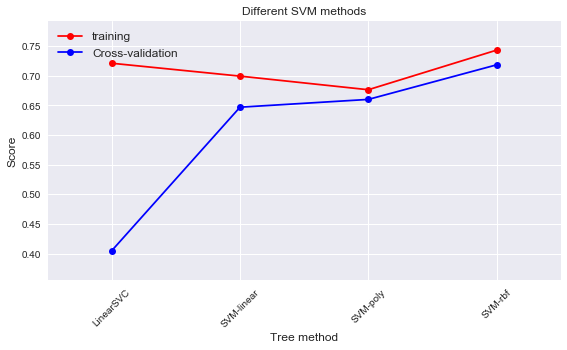

In [46]:
ymin = np.min(cv_score_svm) - 0.05
ymax = np.max(train_score_svm) + 0.05

x_ticks = clf_svm.keys()

plt.figure(figsize = (8, 5))
plt.plot(range(len(x_ticks)), train_score_svm, 'ro-', label = 'training')
plt.plot(range(len(x_ticks)),cv_score_svm, 'bo-', label = 'Cross-validation')

plt.xticks(range(len(x_ticks)),x_ticks,rotation = 45, fontsize = 10)
plt.xlabel("Tree method", fontsize = 12)
plt.ylabel("Score", fontsize = 12)
plt.xlim(-0.5, 3.5)
plt.ylim(ymin, ymax)

plt.legend(loc = 'best', fontsize = 12)
plt.title("Different SVM methods")

plt.tight_layout()

# 5. Xgboost

In [2]:
import xgboost as xgb

In [29]:
def customized_eval(preds, dtrain):
    labels = dtrain.get_label()
    top = []
    for i in range(preds.shape[0]):
        top.append(np.argsort(preds[i])[: : -1][: 5])
    mat = np.reshape(np.repeat(labels,np.shape(top)[1]) == np.array(top).ravel(),np.array(top).shape).astype(int)
    score = np.mean(np.sum(mat / np.log2(np.arange(2, mat.shape[1] + 2)),axis = 1))
    return 'ndcg5', score

In [30]:
# xgboost parameters

NUM_XGB = 200

params = {}
params['colsample_bytree'] = 0.6
params['max_depth'] = 6
params['subsample'] = 0.8
params['eta'] = 0.3
params['seed'] = RANDOM_STATE
params['num_class'] = 12
params['objective'] = 'multi:softprob'   # output the probability instead of class. 

print (params)

{'seed': 2017, 'num_class': 12, 'eta': 0.3, 'colsample_bytree': 0.6, 'subsample': 0.8, 'objective': 'multi:softprob', 'max_depth': 6}


In [31]:
train_score_iter = []
cv_score_iter = []

kf = KFold(n_splits = 3, random_state = RANDOM_STATE)

k_ndcg = 5


for train_index, test_index in kf.split(xtrain_new, ytrain_new):

    X_train, X_test = xtrain_new[train_index, :], xtrain_new[test_index, :]
    y_train, y_test = ytrain_new[train_index], ytrain_new[test_index]

    print (X_train.shape, X_test.shape)
    
    train_xgb = xgb.DMatrix(X_train, label = y_train)
    test_xgb = xgb.DMatrix(X_test, label = y_test)
    
    watchlist = [ (train_xgb,'train'), (test_xgb, 'test') ]

    bst = xgb.train(params, 
                    train_xgb,
                    NUM_XGB,
                    watchlist,
                    feval = customized_eval,
                    verbose_eval = 3,
                    early_stopping_rounds = 5)
    
    
    #bst = xgb.train( params, dtrain, num_round, evallist )

    y_pred = np.array(bst.predict(test_xgb))
    y_pred_train = np.array(bst.predict(train_xgb))
    
    # for binary classification: we used to use f1 score, precision, recall, auc score.
    # here for Airbnb we use the ndcg evaluation. 

    train_ndcg_score = ndcg_score(y_train, y_pred_train , k = k_ndcg)
    cv_ndcg_score = ndcg_score(y_test, y_pred, k = k_ndcg)

    train_score_iter.append(train_ndcg_score)
    cv_score_iter.append(cv_ndcg_score)

train_score_xgb = np.mean(train_score_iter)
cv_score_xgb = np.mean(cv_score_iter)

print ("\nThe training score is: {}".format(train_score_xgb))
print ("The cv score is: {}\n".format(cv_score_xgb))

(1422, 203) (712, 203)
[0]	train-ndcg5:0.803929	test-ndcg5:0.756891
Multiple eval metrics have been passed: 'test-ndcg5' will be used for early stopping.

Will train until test-ndcg5 hasn't improved in 5 rounds.
[3]	train-ndcg5:0.838447	test-ndcg5:0.755209
[6]	train-ndcg5:0.861355	test-ndcg5:0.747769
Stopping. Best iteration:
[1]	train-ndcg5:0.827819	test-ndcg5:0.765599

(1423, 203) (711, 203)
[0]	train-ndcg5:0.813364	test-ndcg5:0.768433
Multiple eval metrics have been passed: 'test-ndcg5' will be used for early stopping.

Will train until test-ndcg5 hasn't improved in 5 rounds.
[3]	train-ndcg5:0.848257	test-ndcg5:0.763716
Stopping. Best iteration:
[0]	train-ndcg5:0.813364	test-ndcg5:0.768433

(1423, 203) (711, 203)
[0]	train-ndcg5:0.812423	test-ndcg5:0.760155
Multiple eval metrics have been passed: 'test-ndcg5' will be used for early stopping.

Will train until test-ndcg5 hasn't improved in 5 rounds.
[3]	train-ndcg5:0.845464	test-ndcg5:0.777263
[6]	train-ndcg5:0.863343	test-ndcg5:0.78

# 6. Model comparison

In [33]:
model_cvscore

array([ 0.744     ,  0.69398238,  0.65828981,  0.69226044,  0.62380661,
        0.67973463,  0.66683704,  0.40473254,  0.64696181,  0.71843773,
        0.66009166,  0.76424166])

In [34]:
model_name

array(['LinearReg',
       dict_keys(['ExtraTree', 'DTree', 'RF', 'GraBoost', 'Bagging', 'AdaBoost']),
       dict_keys(['LinearSVC', 'SVM-linear', 'SVM-rbf', 'SVM-poly']),
       'Xgboost'], dtype=object)

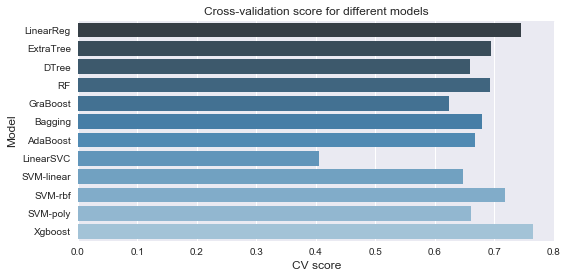

In [35]:
model_cvscore = np.hstack((cv_score_lr, cv_score_tree, cv_score_svm, cv_score_xgb))
#model_name = np.hstack(('LinearReg', clf_tree.keys(), clf_svm.keys(), 'Xgboost'))
model_name = np.array(['LinearReg', 'ExtraTree', 'DTree', 'RF', 'GraBoost', 'Bagging', 'AdaBoost',
                       'LinearSVC', 'SVM-linear', 'SVM-rbf', 'SVM-poly', 'Xgboost'])
fig = plt.figure(figsize = (8, 4))

sns.barplot(model_cvscore, model_name, palette = "Blues_d")

plt.xticks(rotation = 0, size = 10)
plt.xlabel("CV score", fontsize = 12)
plt.ylabel("Model", fontsize = 12)
plt.title("Cross-validation score for different models")

plt.tight_layout()

# 7. Conclusion and tips

1. Further parameters tuning is needed
2. Have not included session dataset information.
3. More feature engineering can be done to improve
4. Only 10% of original dataset is included here. By performing on the whole dataset would expect to have better
   performance.
5. Model ensemble. 